# Diabetes Prediction using Simple Neural Network

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
dataset = pd.read_csv('datasets/diabetes.csv', delimiter=',')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data visualisation

<AxesSubplot:>

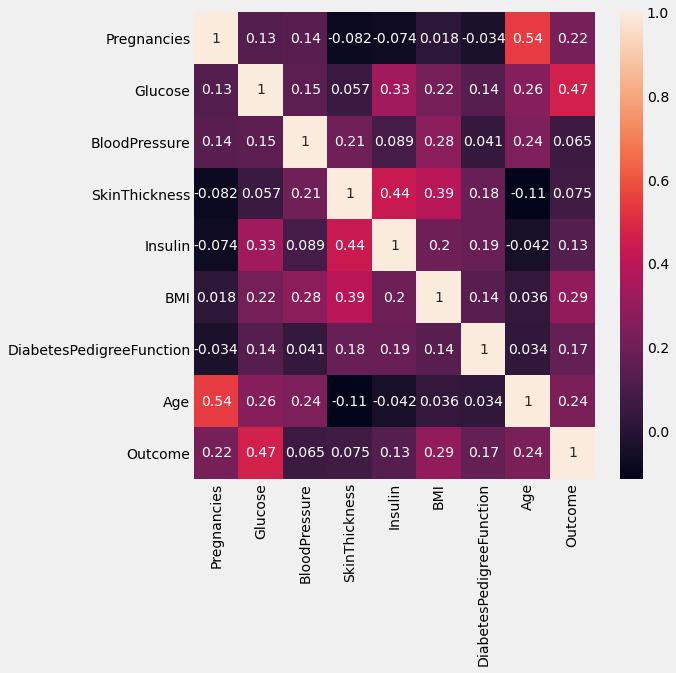

In [5]:
f, ax = plt.subplots(1, figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True, ax=ax)

- Glucose levels had the highest effect on the outcome.
- As expected, pregnancies were correlated to age.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

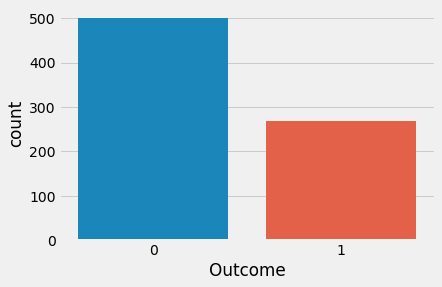

In [6]:
sns.countplot(x=dataset.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

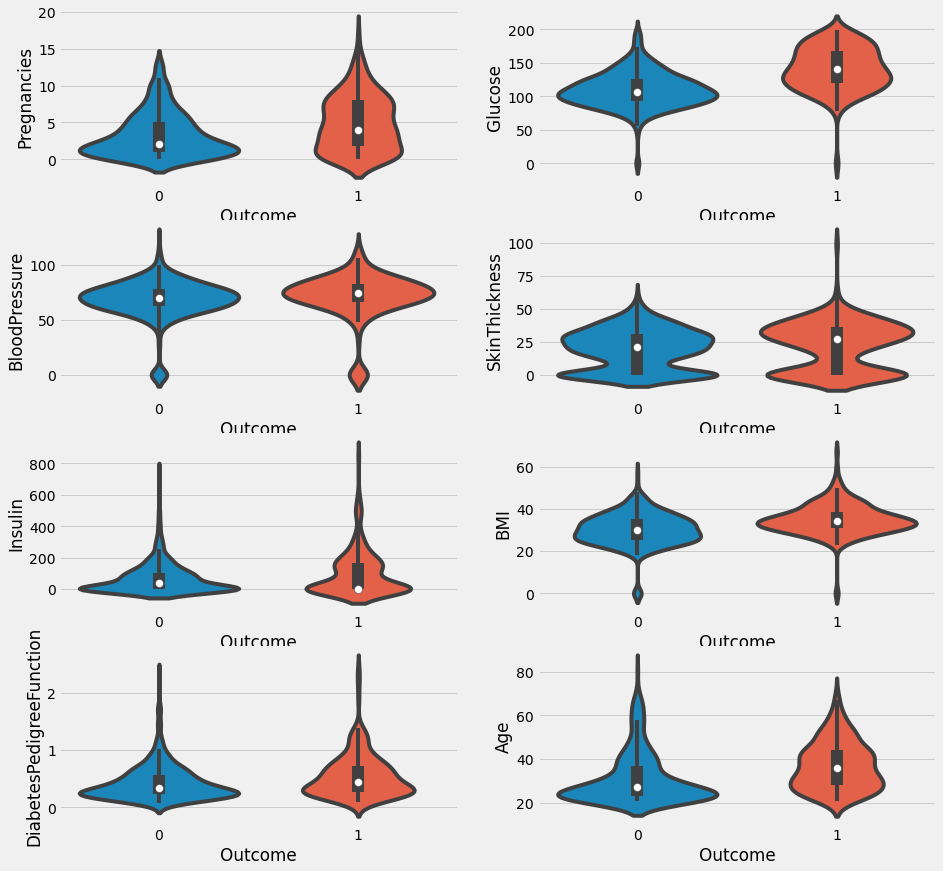

In [10]:
f, axes = plt.subplots(4, 2, figsize=(14, 14))
sns.violinplot(x=dataset.Outcome ,y=dataset.Pregnancies, ax=axes[0,0])
sns.violinplot(x=dataset.Outcome ,y=dataset.Glucose, ax=axes[0,1])
sns.violinplot(x=dataset.Outcome ,y=dataset.BloodPressure, ax=axes[1,0])
sns.violinplot(x=dataset.Outcome ,y=dataset.SkinThickness, ax=axes[1,1])
sns.violinplot(x=dataset.Outcome ,y=dataset.Insulin, ax=axes[2,0])
sns.violinplot(x=dataset.Outcome ,y=dataset.BMI, ax=axes[2,1])
sns.violinplot(x=dataset.Outcome ,y=dataset.DiabetesPedigreeFunction, ax=axes[3,0])
sns.violinplot(x=dataset.Outcome ,y=dataset.Age, ax=axes[3,1])

In [12]:
column_names = dataset.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(dataset.groupby(['Outcome'])[name].mean())
    print('*'*50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

- In the dataset, people diagnosed with diabetes had higher values for every attribute (mean value).

C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Age', ylabel='Density'>

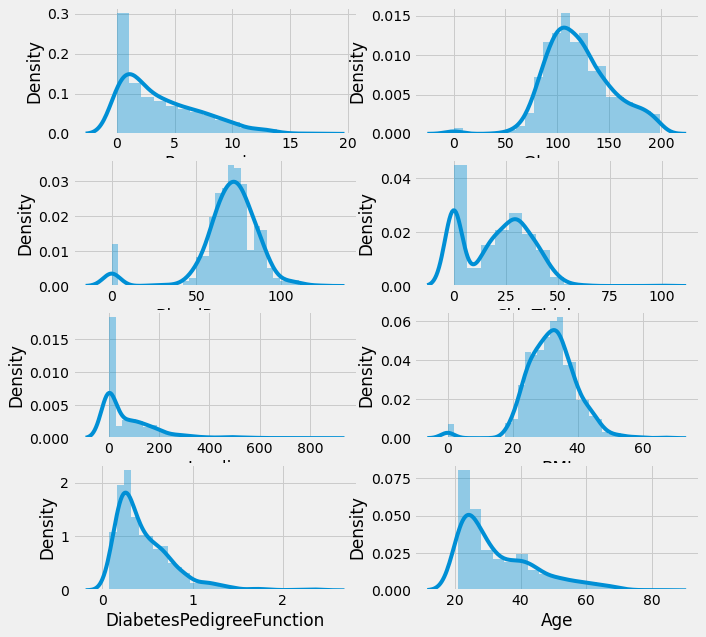

In [20]:
f, axes = plt.subplots(4,2, figsize=(10, 10))
sns.distplot(dataset.Pregnancies, ax=axes[0,0])
sns.distplot(dataset.Glucose, ax=axes[0,1])
sns.distplot(dataset.BloodPressure, ax=axes[1,0])
sns.distplot(dataset.SkinThickness, ax=axes[1,1])
sns.distplot(dataset.Insulin, ax=axes[2,0])
sns.distplot(dataset.BMI, ax=axes[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(dataset.Age, ax=axes[3,1])

- Skin Thickness, Insulin, Blood Pressure, Glucose and BMI had no NaNs but some of the data was encoded as 0s.
- This data was replaced using the median value.

In [21]:
dataset.SkinThickness.replace(0, dataset.SkinThickness.median(), inplace=True)
dataset.Insulin.replace(0, dataset.Insulin.median(), inplace=True)
dataset.Glucose.replace(0, dataset.Glucose.median(), inplace=True)
dataset.BloodPressure.replace(0, dataset.BloodPressure.median(), inplace=True)
dataset.BMI.replace(0, dataset.BMI.median(), inplace=True)

C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sunde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Age', ylabel='Density'>

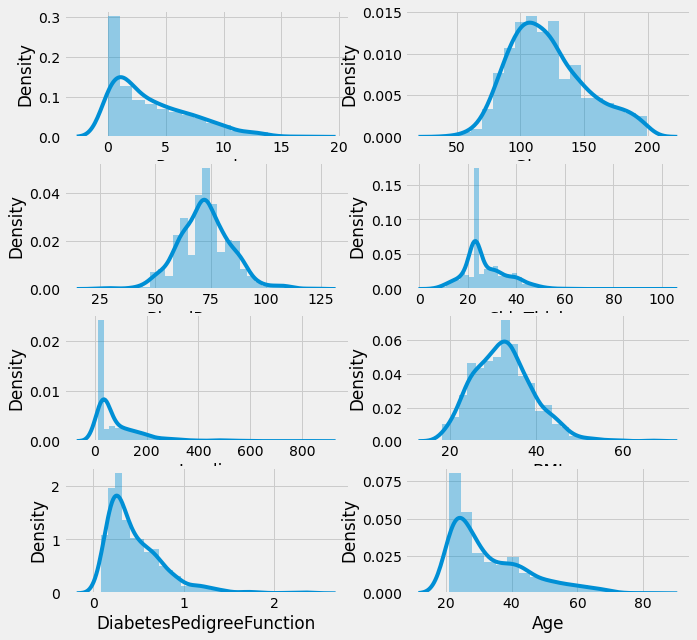

In [22]:
f, axes = plt.subplots(4,2, figsize=(10, 10))
sns.distplot(dataset.Pregnancies, ax=axes[0,0])
sns.distplot(dataset.Glucose, ax=axes[0,1])
sns.distplot(dataset.BloodPressure, ax=axes[1,0])
sns.distplot(dataset.SkinThickness, ax=axes[1,1])
sns.distplot(dataset.Insulin, ax=axes[2,0])
sns.distplot(dataset.BMI, ax=axes[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(dataset.Age, ax=axes[3,1])

## Neural Network

### Preprocess dataset

- Split the data into a training set, dev set and test set.
- Normalize the data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

X = dataset.drop('Outcome', axis =1).values
y = dataset.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

nl = Normalizer()
X_train = nl.fit_transform(X_train)

X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

### Neural Network Architecture

- 3 hidden layers.
- Output layer with sigmoid activation.

In [40]:
import tensorflow as tf
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [26]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [129]:
def nn2():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu', name='Dense1'),
        tf.keras.layers.Dropout(0.2, name='Dropout1'),
        tf.keras.layers.Dense(128, activation='relu', name='Dense2'),
        tf.keras.layers.Dropout(0.2, name='Dropout2'),
        tf.keras.layers.Dense(128, activation='relu', name='Dense3'),
        tf.keras.layers.Dropout(0.2, name='Dropout3'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='OutLayer')
    ])

In [130]:
model = nn2()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 256)               2304      
_________________________________________________________________
Dropout1 (Dropout)           (None, 256)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 128)               32896     
_________________________________________________________________
Dropout2 (Dropout)           (None, 128)               0         
_________________________________________________________________
Dense3 (Dense)               (None, 128)               16512     
_________________________________________________________________
Dropout3 (Dropout)           (None, 128)               0         
_________________________________________________________________
OutLayer (Dense)             (None, 1)               

In [131]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [132]:
# Define callbacks
# reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [133]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[early_stopping], verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.6127 - val_loss: 0.5996 - val_accuracy: 0.7130
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6425 - val_loss: 0.6116 - val_accuracy: 0.7130
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6425 - val_loss: 0.5910 - val_accuracy: 0.7130
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6425 - val_loss: 0.5906 - val_accuracy: 0.7130
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6369 - val_loss: 0.5685 - val_accuracy: 0.7130
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6387 - val_loss: 0.5649 - val_accuracy: 0.7130
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6499 - val_loss: 0.5457 - val_accuracy: 0.7130
Epoch 8/200
1

17/17 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7356 - val_loss: 0.5173 - val_accuracy: 0.7130
Epoch 59/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7356 - val_loss: 0.5116 - val_accuracy: 0.7304
Epoch 60/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7486 - val_loss: 0.5332 - val_accuracy: 0.7217
Epoch 61/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7263 - val_loss: 0.5160 - val_accuracy: 0.7217
Epoch 62/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7374 - val_loss: 0.5114 - val_accuracy: 0.7391
Epoch 63/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7374 - val_loss: 0.5116 - val_accuracy: 0.7304
Epoch 64/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7393 - val_loss: 0.5142 - val_accuracy: 0.7130
Epoch 65/200
17/17 

17/17 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7691 - val_loss: 0.5056 - val_accuracy: 0.7478
Epoch 116/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7654 - val_loss: 0.5200 - val_accuracy: 0.7391
Epoch 117/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7449 - val_loss: 0.5109 - val_accuracy: 0.7478


## Evaluate the model

In [134]:
from sklearn.metrics import classification_report, accuracy_score

x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))

Training set:
	Accuracy:0.788
	Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       345
           1       0.70      0.70      0.70       192

    accuracy                           0.79       537
   macro avg       0.77      0.77      0.77       537
weighted avg       0.79      0.79      0.79       537

Dev set:
	Accuracy:0.748
	Classification Report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.56      0.58      0.57        33

    accuracy                           0.75       115
   macro avg       0.69      0.70      0.69       115
weighted avg       0.75      0.75      0.75       115

Test set:
	Accuracy:0.724
	Classification Report
              precision    recall  f1-score   support

           0       0.75      0.85      0.79        73
           1       0.67      0.51      0.58        43

    accuracy                    